In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Declare transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
# Load data and transform
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)

In [4]:
# Create dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [5]:
# Build model

class MNIST_NN(nn.Module):
  def __init__(self):
    super(MNIST_NN, self).__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [6]:
# Init model
model = MNIST_NN()
model.train()


MNIST_NN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [7]:
# Loss function and optimizer

ce_loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.85)

In [23]:
# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
num_epochs = 5
train_losses = []

def trainingloop(num_epochs):
  for epoch in range(num_epochs):
    running_loss = 0.0

    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device)
      optimizer.zero_grad()
      outputs = model(images)
      loss = ce_loss(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}")
    train_losses.append(train_loss)

trainingloop(num_epochs)
print(train_losses)

Epoch 1, Loss: 0.2729
Epoch 2, Loss: 0.2583
Epoch 3, Loss: 0.2449
Epoch 4, Loss: 0.2320
Epoch 5, Loss: 0.2194
[0.2729485404929881, 0.2582840995430184, 0.24492102148118558, 0.23195786566050577, 0.21938188179437793]


In [27]:
# Test runthrough

test_loss = 0.0

def nn_test():
  model.eval()
  correct = 0
  total = 0
  global test_loss

  with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = ce_loss(outputs, labels)
      test_loss += loss.item()


      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  test_loss = test_loss / len(test_loader)
  accuracy = correct / total * 100

  print(f"Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")
  model.train()

nn_test()
print(test_loss)

Test Loss: 0.2122, Accuracy: 93.86%
0.21218829513023232


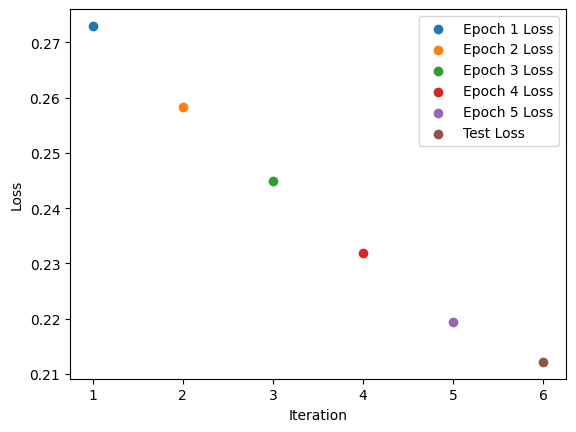

In [30]:
# Visual Graph

for i in range(len(train_losses)):
  plt.scatter(i + 1, train_losses[i], label='Epoch ' + str(i + 1) + ' Loss')
plt.scatter(num_epochs + 1, test_loss, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()